In [2]:
X = lire_mnist_digits([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], examples_per_char=39)

MNIST dataset already exists.


In [38]:
p = X.shape[1]
lr = 0.01
batch_size = 10
epochs = 1000
q = [100,200,500]
q2 = [800,1000,1200]

In [39]:
history_list, weights_list, free_energy_list, weight_snapshots_list, gradients_list, avg_activations_list, hidden_probs_snapshots_list = ([] for _ in range(7))
rbm_list = []

In [40]:
for q_ in q2:
    rbm = RBM(p, q_)
    rbm_list.append(rbm)
    history, weights, free_energy, weight_snapshots, gradients, avg_activations, hidden_probs_snapshots = rbm.train_RBM(X, learning_rate=lr, batch_size=batch_size, epochs=epochs)
    history_list.append(history)
    weights_list.append(weights)
    free_energy_list.append(free_energy)
    weight_snapshots_list.append(weight_snapshots)
    gradients_list.append(gradients)
    avg_activations_list.append(avg_activations)
    hidden_probs_snapshots_list.append(hidden_probs_snapshots)

100%|██████████| 1000/1000 [03:02<00:00,  5.48it/s]


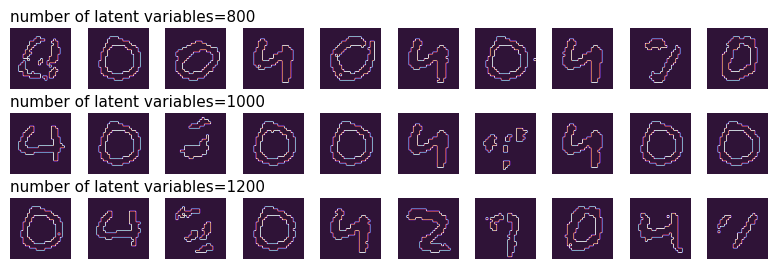

In [42]:
taille_image = (28, 28)
all_images = []

for idx, rbm in enumerate(rbm_list):
    images = generer_image_RBM(model=rbm, nb_images=10, nb_iter=200, size_img=taille_image)
    all_images.extend(images)


def plot_images_grid(images, rows, cols, labels, figsize=(10, 3), hspace=0.4, wspace=0.01):
    assert len(images) == rows * cols, "Number of images must match grid dimensions."
    assert len(labels) == rows, "Number of labels must match the number of rows."
    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='twilight_shifted')
        ax.axis('off')
        if i % cols == 0:
            row_idx = i // cols
            ax.set_title(f'number of latent variables={labels[row_idx]}', loc='left', fontsize=11, pad=5)

    plt.subplots_adjust(hspace=hspace, wspace=0)
    plt.show()

plot_images_grid(all_images, rows=3, cols=10, labels = [800,1000,1200])